In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df=pd.read_csv('dataset/preprocessed_data.csv',low_memory=False)

In [3]:
# apply association rule mining
df.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
FirstPaymentDate                               0
VerificationType                              50
LanguageCode                                   0
Age                                            0
Gender                                        45
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                              6690
UseOfLoan                                 335953
Education                                  10732
MaritalStatus                             336011
EmploymentStatus                          336187
EmploymentDurationCurrentEmployer          10896
OccupationArea      

In [4]:
df.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
FirstPaymentDate                               0
VerificationType                              50
LanguageCode                                   0
Age                                            0
Gender                                        45
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                              6690
UseOfLoan                                 335953
Education                                  10732
MaritalStatus                             336011
EmploymentStatus                          336187
EmploymentDurationCurrentEmployer          10896
OccupationArea      

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(6985, 40)

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.append('loanStatus')

In [8]:
Apriori_df = df[cat_cols]

In [9]:
Apriori_df.isnull().sum()

FirstPaymentDate                     0
VerificationType                     0
LanguageCode                         0
Gender                               0
Country                              0
UseOfLoan                            0
Education                            0
MaritalStatus                        0
EmploymentStatus                     0
EmploymentDurationCurrentEmployer    0
OccupationArea                       0
HomeOwnershipType                    0
Rating                               0
CreditScoreEsMicroL                  0
loanStatus                           0
dtype: int64

In [10]:
Apriori_df['loanStatus'].replace({1:'defaulted', 0:'not defaulted'},inplace=True)

In [11]:
Apriori_df.head()

,FirstPaymentDate,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,CreditScoreEsMicroL,loanStatus
14,2015-05-04,Income verified,Spanish,Male,Spain,Home improvement,Basic education,Married,Fully employed,UpTo5Years,Other,Living with parents,F,M3,defaulted
17,2016-02-01,Income and expenses verified,Spanish,Woman,Spain,Other,Secondary Education,Divorced,Retiree,UpTo1Year,Other,"Tenant, pre-furnished property",HR,M5,defaulted
19,2016-01-04,Income and expenses verified,Spanish,Woman,Spain,Other,Secondary Education,Married,Fully employed,UpTo5Years,Retail and wholesale,"Tenant, unfurnished property",HR,M5,defaulted
28,2015-05-25,Income unverified,Spanish,Male,Spain,Vehicle,Vocational education,Cohabitant,Retiree,MoreThan5Years,Other,Owner,HR,M5,not defaulted
57,2016-03-07,Income unverified,Spanish,Woman,Spain,Other,Higher education,Single,Fully employed,UpTo1Year,Other,Owner,HR,M5,defaulted


In [12]:
# apply assosiation rule mining

# convert data into list of lists
df_lists = Apriori_df.values.tolist()

records = []
for record in df_lists:
    records.append(list(filter(lambda a: a != 0, record)))
    
# Convert all values to string
records = [[str(item) for item in record] for record in records]
    

In [13]:
# Initialize TransactionEncoder
te = TransactionEncoder()

# Transform the data into an array
te_ary = te.fit(records).transform(records)

# Convert the array into a dataframe
df = pd.DataFrame(te_ary, columns=te.columns_) 

In [14]:
df.shape

(6985, 639)

In [15]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)   

In [16]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules_defaulted = rules[rules['consequents'].apply(lambda x: 'defaulted' in str(x))]
print(rules.to_string())

                                     antecedents                                  consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
0                                           (HR)                             (Fully employed)            0.759198            0.772369  0.589120    0.775976  1.004669  0.002738    1.016099       0.019301
1                               (Fully employed)                                         (HR)            0.772369            0.759198  0.589120    0.762743  1.004669  0.002738    1.014942       0.020418
2                                        (Other)                             (Fully employed)            0.541303            0.772369  0.409162    0.755885  0.978657 -0.008923    0.932472      -0.045386
3                               (Fully employed)                                      (Other)            0.772369            0.541303  0.409162    0.529750  0.978657 -0.008923    0.975432 

In [17]:
sorted_by_support = rules_defaulted.sort_values(by="support", ascending=False)
print(sorted_by_support.head(20).to_string())

                 antecedents                  consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
41                   (Spain)                  (defaulted)            1.000000            0.791267  0.791267    0.791267  1.000000  0.000000    1.000000       0.000000
178         (Spain, Spanish)                  (defaulted)            0.991983            0.791267  0.784395    0.790735  0.999327 -0.000528    0.997456      -0.077476
43                 (Spanish)                  (defaulted)            0.991983            0.791267  0.784395    0.790735  0.999327 -0.000528    0.997456      -0.077476
180                  (Spain)         (defaulted, Spanish)            1.000000            0.784395  0.784395    0.784395  1.000000  0.000000    1.000000       0.000000
181                (Spanish)           (defaulted, Spain)            0.991983            0.791267  0.784395    0.790735  0.999327 -0.000528    0.997456      -0.07747

In [18]:
sorted_by_confidence = rules_defaulted.sort_values(by="confidence", ascending=False)
print(sorted_by_confidence.head(20).to_string(index=False))

                         antecedents                 consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                         (HR, Spain)                 (defaulted)            0.759198            0.791267 0.614603    0.809542 1.023096  0.013874    1.095952       0.093746
                                (HR)                 (defaulted)            0.759198            0.791267 0.614603    0.809542 1.023096  0.013874    1.095952       0.093746
                                (HR)          (defaulted, Spain)            0.759198            0.791267 0.614603    0.809542 1.023096  0.013874    1.095952       0.093746
                       (HR, Spanish)                 (defaulted)            0.752040            0.791267 0.608590    0.809252 1.022729  0.013525    1.094286       0.089628
                (HR, Spain, Spanish)                 (defaulted)            0.752040            0.791267 0.608590    0.809252 1.022729  0.01

In [19]:
sorted_by_lift = rules_defaulted.sort_values(by="lift", ascending=False)
print(sorted_by_lift.head(20).to_string(index=False))

                antecedents                                 consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
              (HR, Spanish)          (defaulted, Spain, Fully employed)            0.752040            0.608876 0.470293    0.625357 1.027068  0.012394    1.043991       0.106284
              (HR, Spanish)                 (defaulted, Fully employed)            0.752040            0.608876 0.470293    0.625357 1.027068  0.012394    1.043991       0.106284
       (HR, Spain, Spanish)                 (defaulted, Fully employed)            0.752040            0.608876 0.470293    0.625357 1.027068  0.012394    1.043991       0.106284
                (HR, Spain)                 (defaulted, Fully employed)            0.759198            0.608876 0.474445    0.624929 1.026365  0.012188    1.042800       0.106677
                       (HR)                 (defaulted, Fully employed)            0.759198            0.

In [20]:
sorted_by_leverage = rules_defaulted.sort_values(by="leverage", ascending=False)
print(sorted_by_leverage.head(20).to_string(index=False))

                antecedents                                 consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                       (HR)                                 (defaulted)            0.759198            0.791267 0.614603    0.809542 1.023096  0.013874    1.095952       0.093746
                       (HR)                          (defaulted, Spain)            0.759198            0.791267 0.614603    0.809542 1.023096  0.013874    1.095952       0.093746
                (HR, Spain)                                 (defaulted)            0.759198            0.791267 0.614603    0.809542 1.023096  0.013874    1.095952       0.093746
              (HR, Spanish)                                 (defaulted)            0.752040            0.791267 0.608590    0.809252 1.022729  0.013525    1.094286       0.089628
              (HR, Spanish)                          (defaulted, Spain)            0.752040            0.

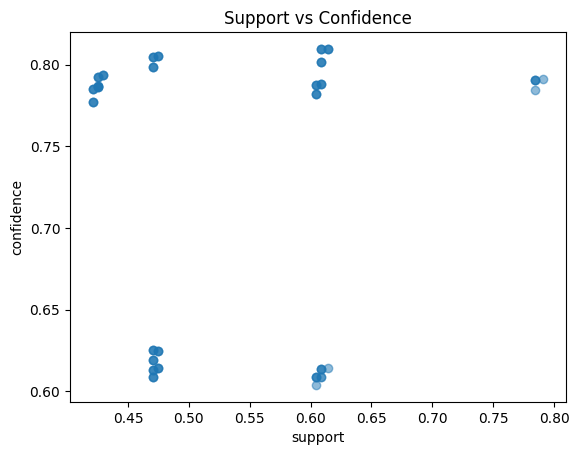

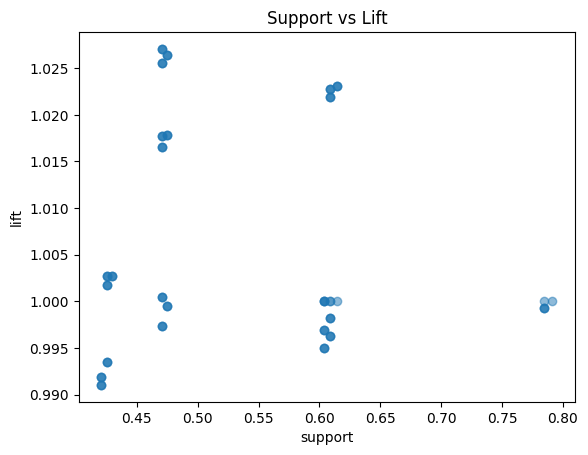

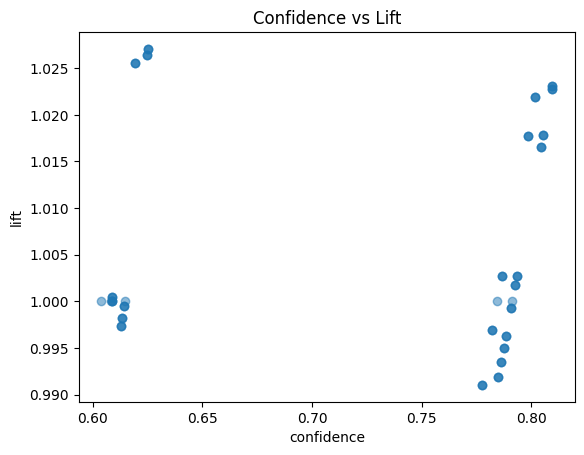

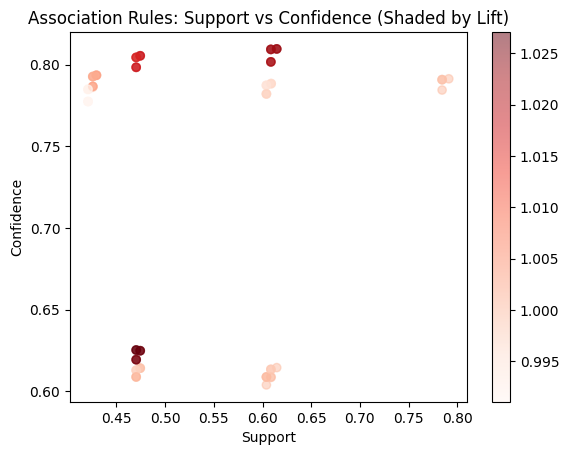

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot support vs. confidence
plt.scatter(rules_defaulted['support'], rules_defaulted['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Plot support vs. lift
plt.scatter(rules_defaulted['support'], rules_defaulted['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Plot confidence vs. lift
plt.scatter(rules_defaulted['confidence'], rules_defaulted['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

# Plot support vs. confidence with shading as lift
plt.scatter(rules_defaulted['support'], rules_defaulted['confidence'], c=rules_defaulted['lift'], cmap='Reds', alpha=0.5)
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Shaded by Lift)')
plt.show()

In [23]:
# save appriori dataframe as assosiation dataset
Apriori_df.to_csv('dataset/Assisiation.csv',index=False)